<a href="https://colab.research.google.com/github/alexandrufalk/tensorflow/blob/Master/02_neural_network_classification_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification with TensorFlow

A classification problem involves predicting whether something is one thing or another.
for example, you might want to:

Predict whether or not someone has heart disease based on their health parameters. This is called binary classification since there are only two options.

Decide whether a photo of is of food, a person or a dog. This is called multi-class classification since there are more than two options.

Predict what categories should be assigned to a Wikipedia article. This is called multi-label classification since a single article could have more than one category assigned.



# Typical architecture of a classification neural network

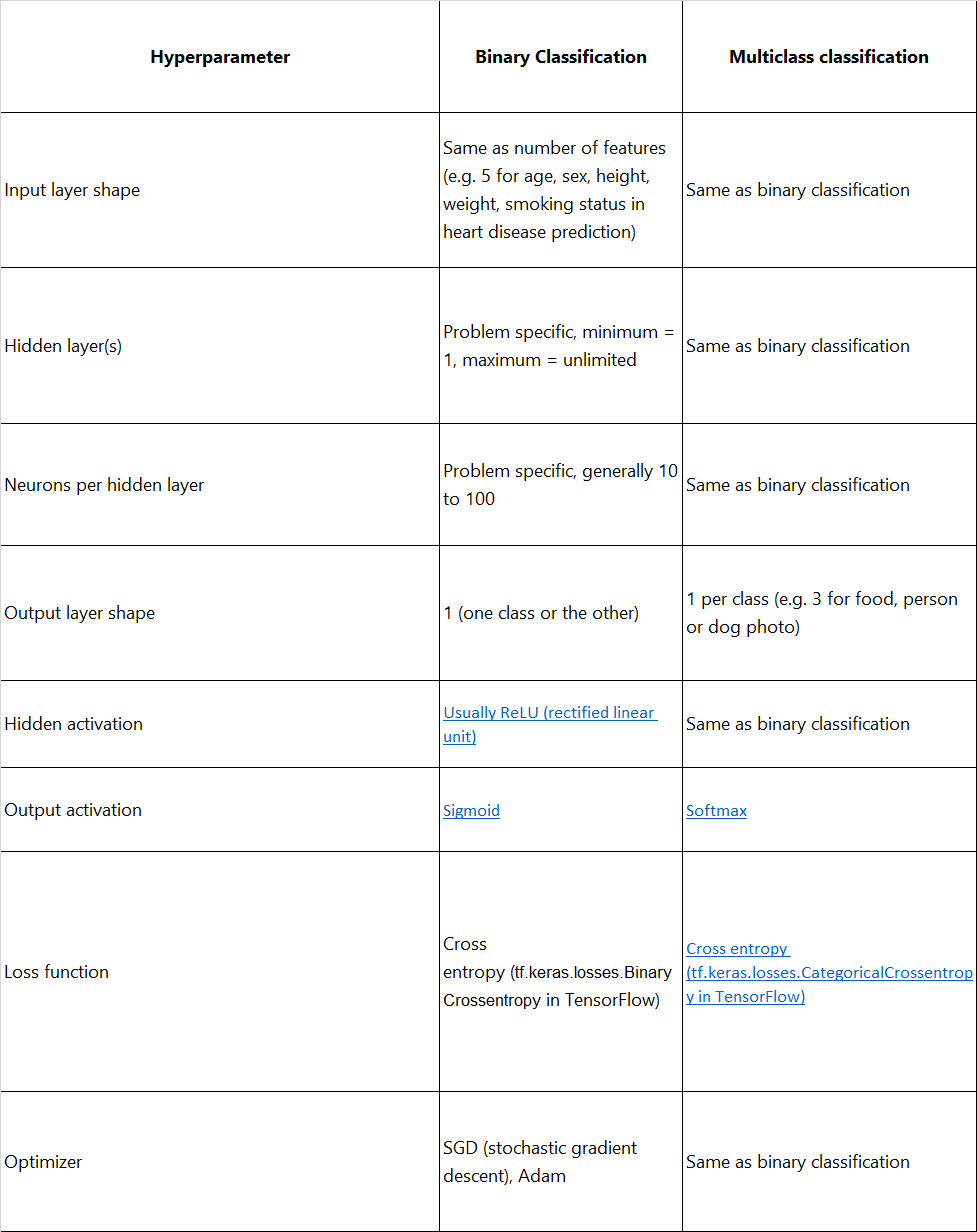

In [1]:
import tensorflow as tf


# Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples=1000

# Create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [3]:
X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [6]:
# Make dataframe of features and labels
import pandas as pd
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


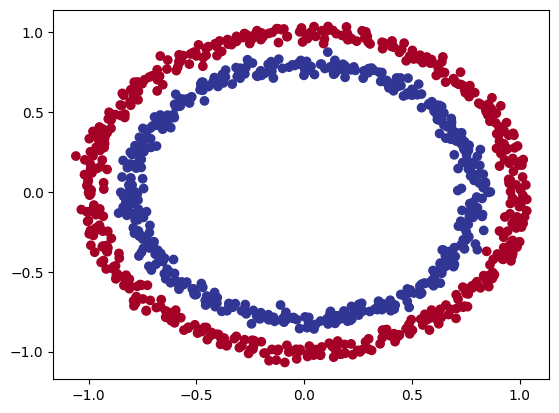

In [7]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


# Input and output shapes

In [8]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [9]:

# Check how many samples we have
len(X), len(y)

(1000, 1000)

In [10]:

# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [11]:
# Create the model

#Set random seed
tf.random.set_seed(42)

#1. Create the model
model1=tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

#3. Fit the model

model1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 3.5191 - accuracy: 0.4730
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7348 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5000
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6953 - accuracy: 0.4890


In [13]:
# Training the model for longer
model1.fit(X,y,epochs=200, verbose=0)

In [14]:
#Evaluate
model1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [15]:
#Improving the model

#set random seed
tf.random.set_seed(42)

#1 Creating the model
model2=tf.keras.Sequential([tf.keras.layers.Dense(100),
                            tf.keras.layers.Dense(10),
                            tf.keras.layers.Dense(1)
                            ])
#2 Compile
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

#3 Fit the model
model2.fit(X,y,epochs=100,verbose=0)

In [16]:
# Evaluate the model
model2.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 0.6997 - accuracy: 0.5110


[0.6996996402740479, 0.5109999775886536]